In [3]:
data_train_dir = "/content/insectos_corregido"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/insectos_corregido.zip"

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: insectos_corregido/8335452/d075s0348.jpg  
  inflating: insectos_corregido/8335452/d075s0349.jpg  
  inflating: insectos_corregido/8335452/d075s0350.jpg  
  inflating: insectos_corregido/8335452/d075s0351.jpg  
  inflating: insectos_corregido/8335452/d075s0352.jpg  
  inflating: insectos_corregido/8335452/d075s0364.jpg  
  inflating: insectos_corregido/8335452/d075s0365.jpg  
  inflating: insectos_corregido/8335452/d075s0366.jpg  
  inflating: insectos_corregido/8335452/d075s0367.jpg  
  inflating: insectos_corregido/8335452/d075s0368.jpg  
  inflating: insectos_corregido/8335452/d075s0369.jpg  
  inflating: insectos_corregido/8335452/d075s0370.jpg  
  inflating: insectos_corregido/8335452/d075s0383.jpg  
  inflating: insectos_corregido/8335452/d075s0384.jpg  
  inflating: insectos_corregido/8335452/d075s0385.jpg  
  inflating: insectos_corregido/8335452/d075s0386.jpg  
  inflating: insectos_corregido/8335452/d07

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.layers import BatchNormalization as BN
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.applications import VGG19
from keras.metrics import TopKCategoricalAccuracy

In [14]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [15]:
target_size = (64, 32)
batch_size = 512
mode = 'categorical'
numclasses = 291

In [16]:
train_generator = train_datagen.flow_from_directory(
    data_train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=mode,
    subset='training') # set as training data

Found 50776 images belonging to 291 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(
    data_train_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    class_mode=mode,
    subset='validation') # set as validation data

Found 12543 images belonging to 291 classes.


In [18]:
## DEF NN TOPOLOGY  
model = VGG19(weights=None, classes=291, input_shape=(*target_size, 3))

In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss')

In [20]:
checkpoint_cb = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/insectos_vgg19/insectos_vgg19_weight", save_best_only=True, save_weights_only=True, monitor='val_accuracy')

In [21]:
## OPTIM AND COMPILE
opt = SGD(lr=0.1, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy', TopKCategoricalAccuracy(k=3, name="Top_3_accuracy")])

In [22]:
## TRAINING with DA and LRA
history=model.fit_generator(train_generator,
                            steps_per_epoch=len(train_generator.filenames) // batch_size, 
                            epochs=100,
                            validation_data=validation_generator,
                            callbacks=[reduce_lr,checkpoint_cb],
                            verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
99/99 [==============================] - 287s 3s/step - loss: 5.6657 - accuracy: 0.0109 - Top_3_accuracy: 0.0308 - val_loss: 5.6359 - val_accuracy: 0.0137 - val_Top_3_accuracy: 0.0381
Epoch 2/100
99/99 [==============================] - 257s 3s/step - loss: 5.5966 - accuracy: 0.0127 - Top_3_accuracy: 0.0376 - val_loss: 5.4934 - val_accuracy: 0.0137 - val_Top_3_accuracy: 0.0408
Epoch 3/100
99/99 [==============================] - 247s 3s/step - loss: 5.4956 - accuracy: 0.0144 - Top_3_accuracy: 0.0396 - val_loss: 5.4643 - val_accuracy: 0.0141 - val_Top_3_accuracy: 0.0408
Epoch 4/100
99/99 [==============================] - 246s 2s/step - loss: 5.4735 - accuracy: 0.0137 - Top_3_accuracy: 0.0403 - val_loss: 5.4481 - val_accuracy: 0.0150 - val_Top_3_accuracy: 0.0409
Epoch 5/100
99/99 [==============================] - 247s 2s/step - loss: 5.4596 - accuracy: 0.0149 - Top_3_accuracy: 0.0431 - val_loss: 5.4561 - val_accuracy: 0.0141 - val_Top_3_accuracy: 0.0408
Epoch 6/100
99/99 [=

In [23]:
import matplotlib.pyplot as plt

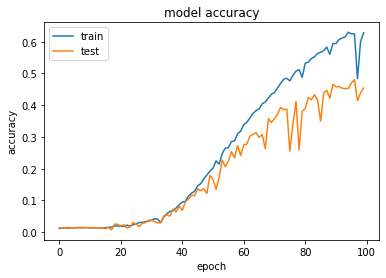

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()